In [1]:
%load_ext autoreload

%autoreload 2

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import animation
from matplotlib.animation import ArtistAnimation, FuncAnimation
from sklearn.datasets import make_blobs, make_circles
from tqdm import tqdm

from mlapp_models.adaptive_basis_functions import AdaBoost, MLPClassifier

plt.rcParams["figure.figsize"] = (10, 7)

# Adaptive Basis Functions

Chapter 16

## Create some data

In [4]:
X_train, y_train = make_blobs(
    200, n_features=2, centers=[[0, 2.5], [2.5, 0]], cluster_std=1.2
)
y_train = (y_train - 0.5) * 2

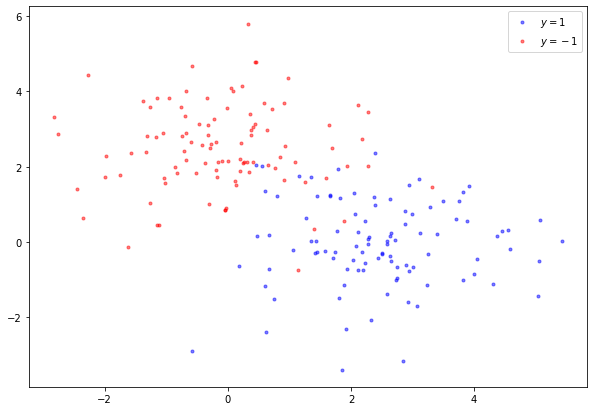

In [5]:
plt.plot(*X_train[y_train == 1].T, "b.", label="$y=1$", alpha=0.5)
plt.plot(*X_train[y_train == -1].T, "r.", label="$y=-1$", alpha=0.5)
plt.legend()
plt.show()

## Fit an AdaBoost model

Section 16.4.3

In [6]:
model1 = AdaBoost(num_learners=5)
model2 = AdaBoost(num_learners=25)
model3 = AdaBoost(num_learners=625)

model1.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

100%|███████████████████████████████████████████████████████████████████████████████| 625/625 [00:04<00:00, 139.65it/s]


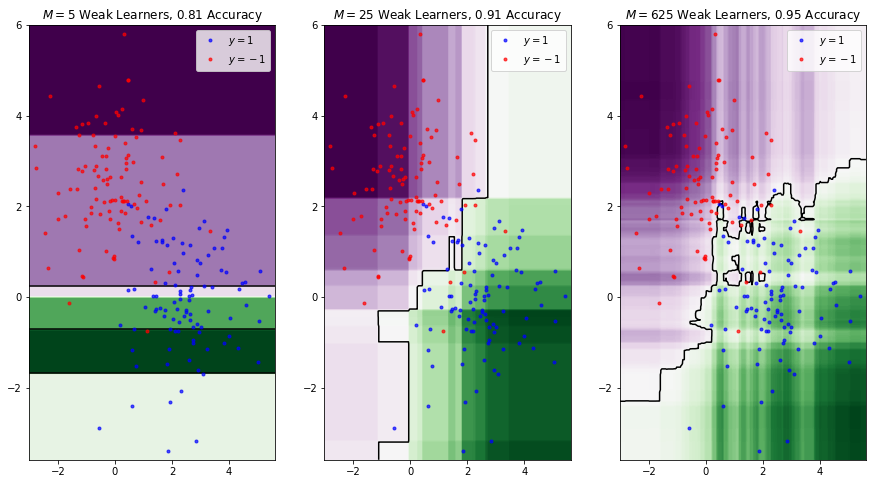

In [7]:
plt.figure(figsize=(15, 8))

margin = 0.2
xlist = np.linspace(X_train[:, 0].min() - margin, X_train[:, 0].max() + margin, 200)
ylist = np.linspace(X_train[:, 1].min() - margin, X_train[:, 1].max() + margin, 200)
X, Y = np.meshgrid(xlist, ylist)
x_star = np.array([X, Y]).reshape(2, -1).T

for i, model in enumerate((model1, model2, model3), start=1):
    plt.subplot(1, 3, i)

    plt.plot(*X_train[y_train == 1].T, "b.", label="$y=1$", alpha=0.7)
    plt.plot(*X_train[y_train == -1].T, "r.", label="$y=-1$", alpha=0.7)

    scores = model.predict(X_train)
    preds = np.ones_like(scores)
    preds[scores < 0] = -1

    Z = model.score(x_star).reshape(200, 200)
    plt.contour(X, Y, Z, levels=1, colors="black")
    plt.contourf(X, Y, Z, levels=400, cmap="PRGn")

    plt.legend()
    accuracy = (preds == y_train).sum() / len(y_train)
    plt.title(f"$M={len(model.learners)}$ Weak Learners, {accuracy:.2f} Accuracy")

In [8]:
# reset the labels
y_train[y_train == -1] = 0

## Fit a Multilayer Perceptron

Section 16.5

In [10]:
model1 = MLPClassifier(input_size=2, num_hidden=2, reg = 0.2)
model2 = MLPClassifier(input_size=2, num_hidden=5, reg = 0.2)
model3 = MLPClassifier(input_size=2, num_hidden=25, reg = 0.2)

model1.fit(X_train, y_train, epochs=40000, lr=1)
model2.fit(X_train, y_train, epochs=160000, lr=1.2)
model3.fit(X_train, y_train, epochs=640000, lr=1.2);

100%|████████████████████████████████████████████████████████████████████████| 640000/640000 [03:10<00:00, 3364.52it/s]


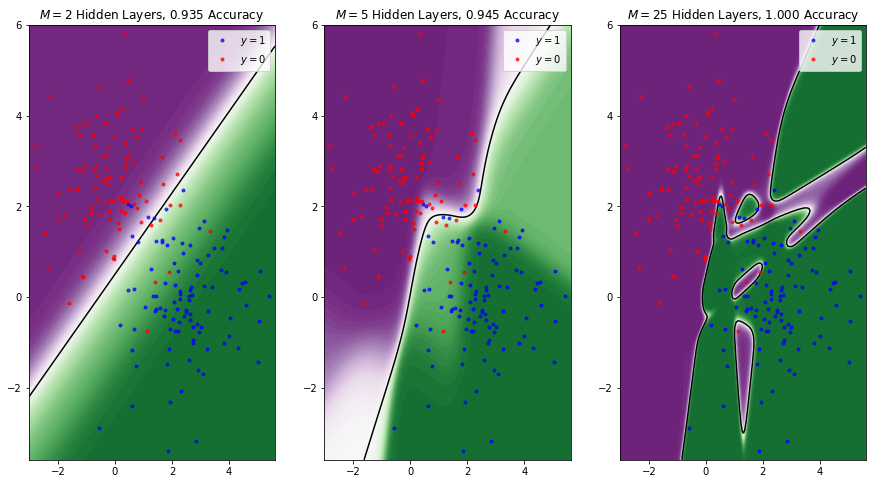

In [11]:
plt.figure(figsize=(15, 8))

margin = 0.2
xlist = np.linspace(X_train[:, 0].min() - margin, X_train[:, 0].max() + margin, 200)
ylist = np.linspace(X_train[:, 1].min() - margin, X_train[:, 1].max() + margin, 200)
X, Y = np.meshgrid(xlist, ylist)
X_star = np.array([X, Y]).reshape(2, -1).T

for i, model in enumerate((model1, model2, model3), start=1):
    plt.subplot(1, 3, i)

    plt.plot(*X_train[y_train == 1].T, "b.", label="$y=1$", alpha=0.7)
    plt.plot(*X_train[y_train == 0].T, "r.", label="$y=0$", alpha=0.7)

    preds = model.predict(X_train)

    Z = model.forward(X_star)[1].reshape(200, 200)
    plt.contour(X, Y, Z, levels=1, colors="black")
    plt.contourf(X, Y, Z, levels=np.linspace(-0.1, 1.1, 100), cmap="PRGn")

    plt.legend()
    accuracy = (preds == y_train).sum() / len(y_train)
    plt.title(f"$M={model.num_hidden}$ Hidden Layers, {accuracy:.3f} Accuracy")

In [12]:
model = MLPClassifier(input_size=3, num_hidden=7, reg=0.2)

In [14]:
margin = 0.2
xlist = np.linspace(X_train[:, 0].min() - margin, X_train[:, 0].max() + margin, 200)
ylist = np.linspace(X_train[:, 1].min() - margin, X_train[:, 1].max() + margin, 200)
X, Y = np.meshgrid(xlist, ylist)
x_star = np.array([X, Y]).reshape(2, -1).T
f_x_star = np.ones((200 ** 2, 3))
f_x_star[:, :2] = x_star
Z = model.forward(f_x_star)[1].reshape(200, 200)

Make an animation showing the mlp fitting to the data.

In [15]:
%matplotlib

Using matplotlib backend: MacOSX


In [30]:
model = MLPClassifier(input_size=2, num_hidden=15, reg=0.2)
fig, ax = plt.subplots()

y1_line = plt.plot(*X_train[y_train == 1].T, "b.", label="$y=1$", alpha=0.7)
y0_line = plt.plot(*X_train[y_train == 0].T, "r.", label="$y=0$", alpha=0.7)

In [31]:
num_frames = 10000

In [34]:
# Create the artists for each frame
def frame_generator(i):
    model.fit(X_train, y_train, lr=0.7, epochs=50,progalse)
    ax.cla()
    Z = model.forward(X_star)[1].reshape(200, 200)
    cont = ax.contour(X, Y, Z, levels=1, colors="black")  # decision boundary
    contf = ax.contourf(X, Y, Z, levels=np.linspace(-0.1, 1.1, 50), cmap="PRGn")
    # actual data
    y1_line = ax.plot(*X_train[y_train == 1].T, "b.", label="$y=1$", alpha=0.7)
    y0_line = ax.plot(*X_train[y_train == 0].T, "r.", label="$y=0$", alpha=0.7)
    print(f"{i}/{num_frames} frames")
    return [*y1_line, *y0_line, *cont.collections, *contf.collections]

In [35]:
%%time
# Save it. Note that you need to have ffmpeg installed. This also takes a really long time.
anim = FuncAnimation(
    fig,
    func=frame_generator,
    interval=100,
    blit=True,
    frames=num_frames,
    repeat=False,
)
anim.save("mlp-fit.mp4", dpi=200, fps=20)
anim._stop()

0/10 frames
0/10 frames
1/10 frames
2/10 frames
3/10 frames
4/10 frames
5/10 frames
6/10 frames
7/10 frames
8/10 frames
9/10 frames
CPU times: user 6.66 s, sys: 1.48 s, total: 8.14 s
Wall time: 1.8 s
0/10 frames


Traceback (most recent call last):
  File "/Users/stevenjinxuan/Desktop/study/MLAPP-Solutions/.venv/lib/python3.8/site-packages/matplotlib/cbook/__init__.py", line 270, in process
    func(*args, **kwargs)
  File "/Users/stevenjinxuan/Desktop/study/MLAPP-Solutions/.venv/lib/python3.8/site-packages/matplotlib/animation.py", line 995, in _start
    self.event_source.add_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'add_callback'
